<a href="https://colab.research.google.com/github/RaviChandraVeeramachaneni/fastbook_myexperiments/blob/main/chapter_4/chap_4_sgd_example.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install -Uqq fastbook
import fastbook
fastbook.setup_book()

     |████████████████████████████████| 727kB 4.3MB/s 
     |████████████████████████████████| 194kB 18.2MB/s 
     |████████████████████████████████| 51kB 7.6MB/s 
     |████████████████████████████████| 1.2MB 18.6MB/s 
     |████████████████████████████████| 61kB 8.3MB/s 
     |████████████████████████████████| 61kB 9.6MB/s 
Mounted at /content/gdrive


In [2]:
from fastai.vision.all import *
from fastbook import *

matplotlib.rc('image', cmap='Greys')

### End-to-End example of a Roller Coaster

#### Calculating the speed for every 20s

In [3]:
time = torch.arange(0,20).float(); time

tensor([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12., 13., 14., 15., 16., 17., 18., 19.])

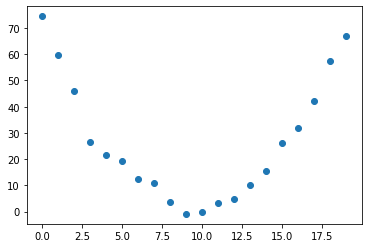

In [4]:
speed = torch.randn(20)*3 + 0.75*(time-9.5)**2 + 1
plt.scatter(time,speed);

#### Considering a sample quadratic function 
    - a*(time**2)+(b*time)+c

In [5]:
def f(t, params):
    a,b,c = params
    return a*(t**2) + (b*t) + c  

#### Defining a loss function
    - Lower the function value, better will the be the model prediction

In [6]:
def mse(preds, targets):
    return ((preds-targets)**2).sqrt().mean()

#### Step 1: Initilaizing the paramters to random values and tracking gradients using requires_grad_() function

In [7]:
params = torch.randn(3).requires_grad_()
orig_params = params.clone()

#### Step 2: Calculating the predictions


In [8]:
preds = f(time, params)

#### Function to see how close our predictions are to our targets

In [9]:
def show_preds(preds, ax=None):
    if ax is None: ax=plt.subplots()[1]
    ax.scatter(time, speed)
    ax.scatter(time, to_np(preds), color='red')
    ax.set_ylim(-300,100)

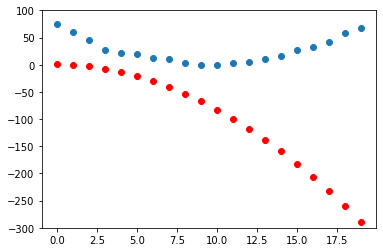

In [10]:
show_preds(preds)

#### Step 3: Calculating the loss

In [11]:
loss = mse(preds, speed)
loss

tensor(126.9454, grad_fn=<MeanBackward0>)

Let's minimize the above using the gradients

#### Step 4: Calculating the gradients

In [12]:
loss.backward()
params.grad

tensor([-123.5000,   -9.5000,   -1.0000])

Picking a learning rate of 0.00001 and multiplying that with gradient

In [13]:
params.grad * 1e-5

tensor([-1.2350e-03, -9.5000e-05, -1.0000e-05])

In [14]:
params

tensor([-0.7658, -0.7506,  1.3525], requires_grad=True)

#### Step 5: Step the weights

Updating the parameters based on the gradients we just calculated

In [15]:
lr = 1e-5
params.data -= lr * params.grad.data
params.grad = None

#### Checking if the loss has improved

In [16]:
preds = f(time,params)
mse(preds, speed)

tensor(126.7920, grad_fn=<MeanBackward0>)

Plotting the graph

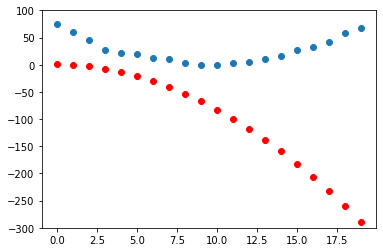

In [17]:
show_preds(preds)

In [18]:
def apply_step(params, prn=True):
    preds = f(time, params)
    loss = mse(preds, speed)
    loss.backward()
    params.data -= lr * params.grad.data
    params.grad = None
    if prn: print(loss.item())
    return preds

In [19]:
for i in range(10): apply_step(params)

126.7919692993164
126.63853454589844
126.48509216308594
126.3316650390625
126.17823791503906
126.02479553222656
125.8713607788086
125.7179183959961
125.56449127197266
125.41104888916016


In [20]:
params = orig_params.detach().requires_grad_()

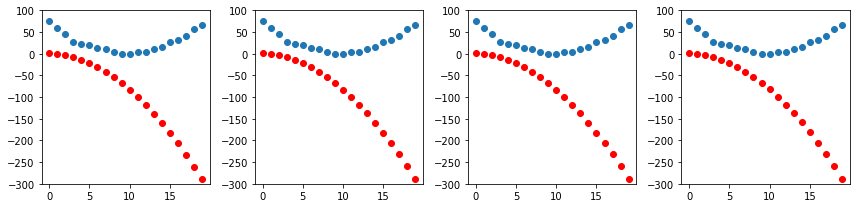

In [21]:
_,axs = plt.subplots(1,4,figsize=(12,3))
for ax in axs: show_preds(apply_step(params, False), ax)
plt.tight_layout()

At this point we can when to stop after looking at training, validation looses & metrics.